# Dependences

In [1]:
using DelimitedFiles
using Images
using Plots

# Function

In [2]:
function countour_func(img, tickness,N)

    # Extracting the grayscale on the image
    img_channel = Gray.(.!(Gray.(img) .< Gray(img[1,1])*0.95))

    # Extracting the Contour on the image
    krnl_h = centered(Gray{Float32}[0 -1 -1 -1 0; 0 -1 -1 -1 0; 0 0 0 0 0; 0 1 1 1 0; 0 1 1 1 0]./12)
    grad_h = imfilter(img_channel, krnl_h')

    krnl_v = centered(Gray{Float32}[0 0 0 0 0; -1 -1 0 1 1;-1 -1 0 1 1;-1 -1 0 1 1;0 0 0 0 0 ]./12)
    grad_v = imfilter(img_channel, krnl_v')

    # Extracting the Contour on the image
    final_img = (grad_h.^2) .+ (grad_v.^2)
    final_img = Gray.(.!(Gray.(final_img) .> tickness))

    # Extracting the index of each point
    idx = CartesianIndices(size(final_img))[final_img .== 0]
    arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

    # Finding the center of center of mass
    center_of_mass = sum(arr_idx, dims=1)/size(arr_idx,1)

    # Putting the index in the center of mass
    center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

    # Put the points on cilidrical coordinates
    r = sqrt.(sum(center_idx .^ 2, dims=2))
    θ = [center_idx[i,2] >= 1 ? pi/2-atan(center_idx[i,1]/center_idx[i,2]) : 3*pi/2-atan(center_idx[i,1]/center_idx[i,2]) for i=1:size(center_idx,1)] 

    cil_idx = hcat(θ,r)

    cil_idx = hcat(
        [pi/N*(2*i-1)  for i=1:N],
        [sum(cil_idx[:,2][2*pi/N*(i-1) .<= cil_idx[:,1] .< 2*pi/N*(i)])/size(cil_idx[:,2][2*pi/N*(i-1) .<= cil_idx[:,1] .< 2*pi/N*(i)],1) for i=1:N]
    ) 
    return (center_idx,cil_idx)
end

countour_func (generic function with 1 method)

# Running

## Extract Shape

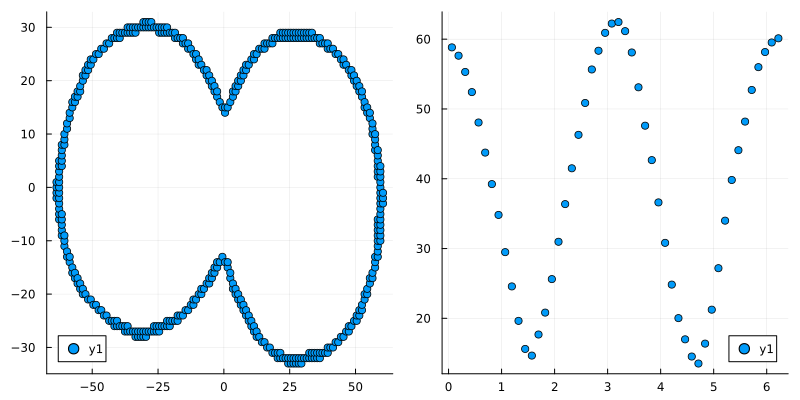

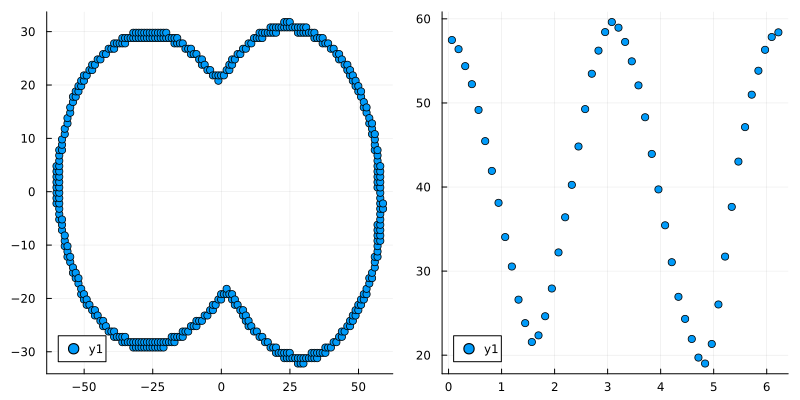

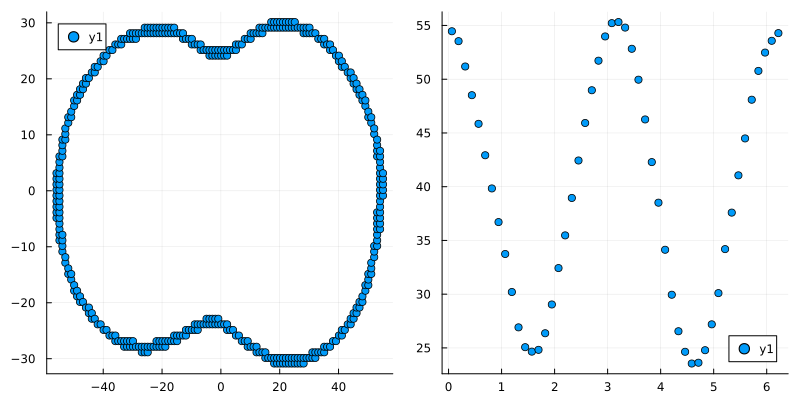

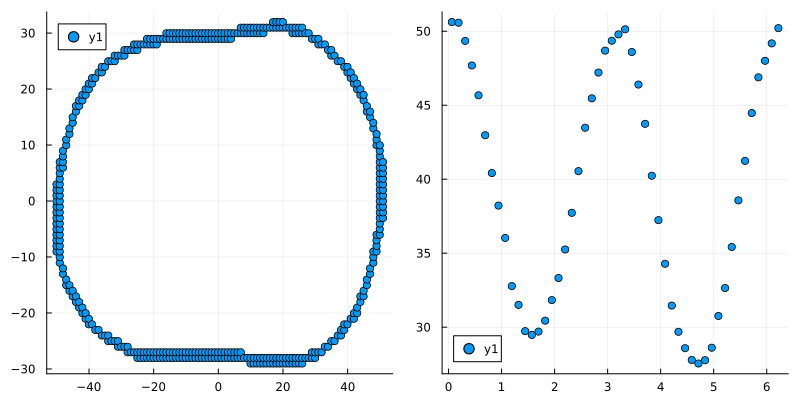

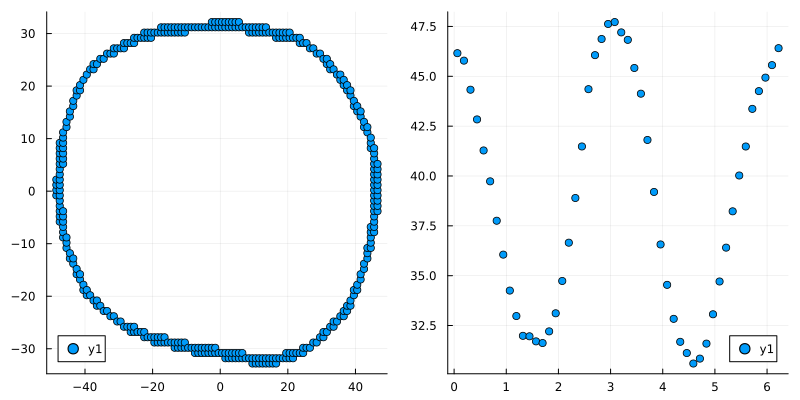

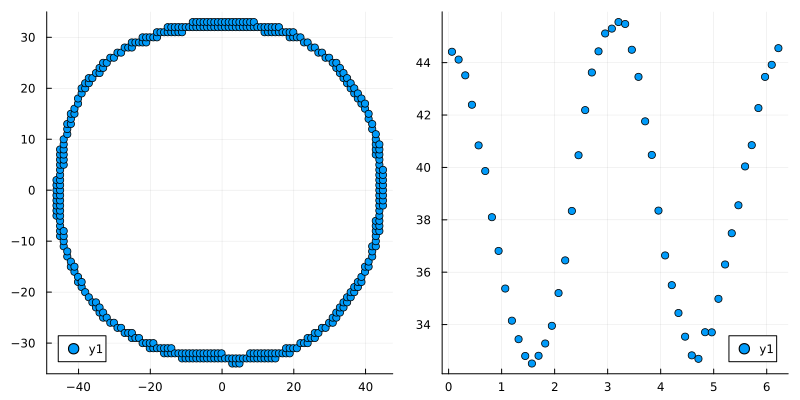

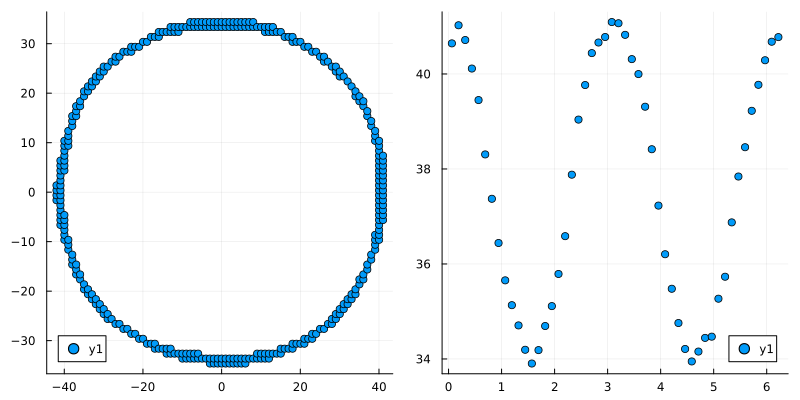

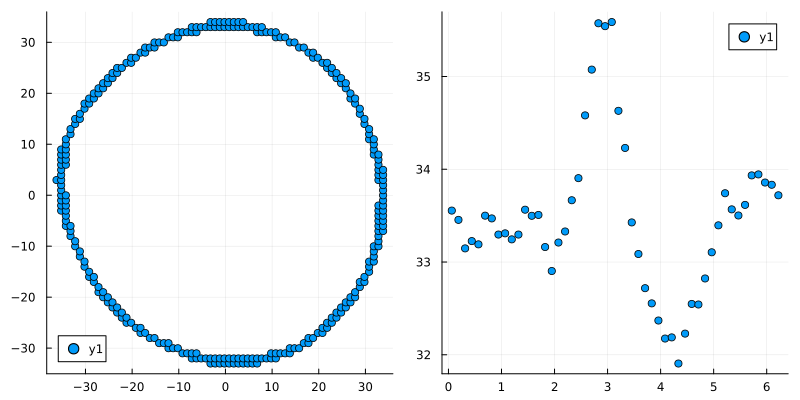

8×2 adjoint(::Matrix{Float64}) with eltype Float64:
 119.603   28.1841
 116.336   40.5754
 108.662   48.2045
 100.618   57.0235
  92.6969  62.2154
  89.0371  65.2052
  81.6775  67.8506
  67.5627  64.8089

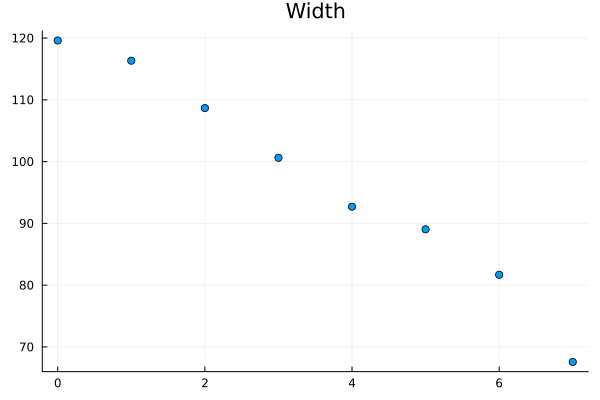

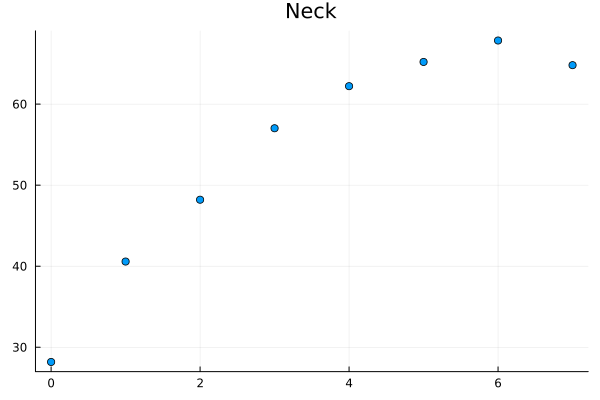

In [72]:
dir      = readdir("data")
data     = [countour_func(load("data/$(dir[d])"), 0.24,50) for d in 1:size(readdir("data"),1)]

DIM_DATA = Array[]
for i = 1:size(dir,1)

    max_min = data[i][2]

    A = maximum(max_min[:,2][0 .<= max_min[:,1] .< pi/8])
    B = minimum(max_min[:,2][pi/2-pi/8 .<= max_min[:,1] .< pi/2+pi/8])
    C = maximum(max_min[:,2][15*pi/8 .<= max_min[:,1] .< 2*pi])
    D = minimum(max_min[:,2][3*pi/2-pi/8 .<= max_min[:,1] .< 3*pi/2+pi/8])
    E = maximum(max_min[:,2][15*pi/8 .<= max_min[:,1] .< 2*pi])
    
    push!(DIM_DATA,[(A+E)/2 + C, B+D])

    p1 = plot(data[i][1][:,1], data[i][1][:,2], seriestype = :scatter)
    p2 = plot(data[i][2][:,1], data[i][2][:,2], seriestype = :scatter)
    display(plot(p1,p2, layout=(1,2),size=(800,400)))
end
DIM_DATA = hcat(DIM_DATA...)'

display(DIM_DATA)

display(plot(collect(0:size(dir,1)-1),DIM_DATA[:,1],seriestype = :scatter, title="Width", legend=false))
display(plot(collect(0:size(dir,1)-1),DIM_DATA[:,2],seriestype = :scatter, title="Neck", legend=false))